# How can you stay safe for 2020


## Exploratory Data analysis for the NJ, PA & NY data


### Question 1. Comparison of the three states

### Question 2. At what weekday do accidents usually occur?

### Question 3. At what time do accidents usually occur on weekdays vs weekends?

### Question 4. At what location do accidents usually occur?

### Question 5. With what weather condition do accidents usually occur?


In [1]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [ ]:
# Define lists of states, colors, linestyles, month order, day_order, and hour_order
state_lst=['NJ','PA','NY']
state_lst_full=['New Jersey','Pennsylvania','New York']
color_lst=['r','b','k']
linestyle_lst=['dashed','dashdot','solid']
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)

In [2]:
# read the survey results, slice the states of interests, and display the first 5 rows
df = pd.read_csv('./US_Accidents_May19.csv')
df = df[df.State.isin(state_lst)]
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min)
0,A-194256,MapQuest,201.0,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,0.01,Accident pedestrian involved on County Hwy-659...,540.0,Main St,L,Orange,Essex,NJ,07050-1520,US,US/Eastern,KEWR,2016-11-30 16:51:00,55.0,NaN,93.0,29.79,2.5,ENE,6.9,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day,2016,Nov,30,16,Wed,45.0
1,A-194257,MapQuest,241.0,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,0.01,Right lane blocked due to accident on I-87 Sou...,NaN,Route 17,R,Sloatsburg,Rockland,NY,10974,US,US/Eastern,KCDW,2016-11-30 16:53:00,53.1,NaN,93.0,29.81,1.0,East,11.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,16,Wed,45.0
2,A-194258,MapQuest,201.0,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,2.53,Accident on I-87 Southbound between Exit 14B C...,NaN,I-287 S,R,Suffern,Rockland,NY,10901,US,US/Eastern,KCDW,2016-11-30 15:53:00,53.1,NaN,93.0,29.83,1.0,ENE,8.1,0.02,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,15,Wed,90.0
3,A-194259,MapQuest,201.0,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,1.17,Accident on I-287 Cross Westchester Expy Eastb...,NaN,Hutchinson River Pkwy S,R,White Plains,Westchester,NY,10605,US,US/Eastern,KHPN,2016-11-30 15:56:00,52.0,NaN,93.0,29.81,2.0,East,17.3,0.15,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,15,Wed,90.0
4,A-194260,MapQuest,201.0,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,NaN,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,NaN,89.0,29.86,3.0,East,10.4,0.05,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,16,Wed,45.0


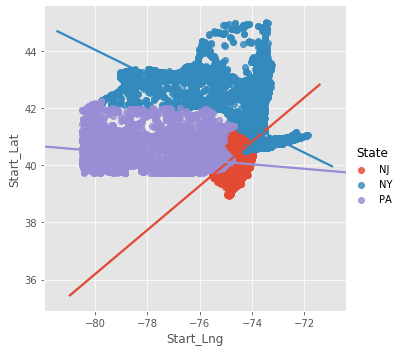

In [4]:
sns.lmplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.show()

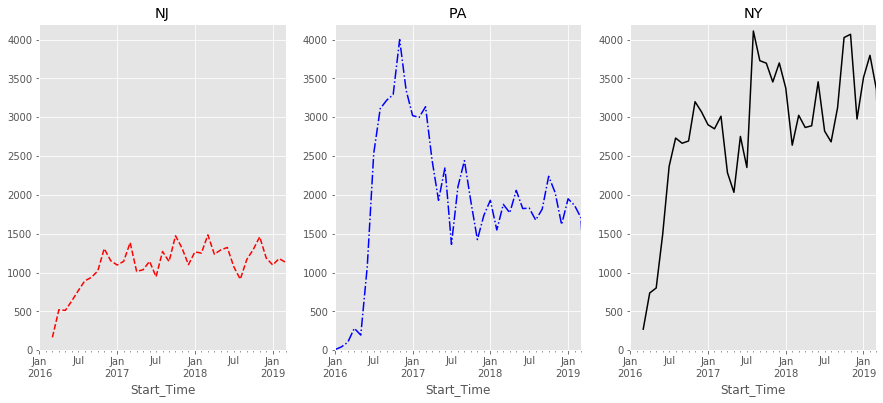

In [55]:
# Time series analysis, resample by month

# Resample by day

df.set_index('Start_Time',drop=True,inplace=True)


# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df[df['State']==state].resample('M').count()['ID'].plot(linestyle=linestyle_lst[i], color=color_lst[i])
    
    plt.xlim('2016','2019-Mar')
    plt.ylim(0,4200)
    plt.xlabel=('Year')
    plt.title('{}'.format(state))

plt.show()


df.reset_index(inplace=True)

In [18]:
# Find out how many unique days in the dataset
allday_lst=df.Start_Time.astype(str).str.split(' ')
allday_lst2=[item[0] for item in allday_lst]

print('For the three states of New Jersey, Pennsylvania, & New York in this dataset:')
print('There are {} total accidents.'.format(df.shape[0]))
print('There are {} total days.'.format(len(allday_lst2)))
print('There are {} unique days.'.format(len(set(allday_lst2))))
print('On average, there are {} accidents per day.'.format(round(df.shape[0]/len(set(allday_lst2)))))

For the three states of New Jersey, Pennsylvania, & New York in this dataset:
There are 221683 total accidents.
There are 221683 total days.
There are 1129 unique days.
On average, there are 196 accidents per day.


In [6]:
# Find out how many unique days for each weekday/weekend
weekday_num=[]

# Run a for loop for the whole week
for weekday in weekday_lst:
    # Slice the dataframe for specific weekday
    df_weekday=df[df.Start_Weekday==weekday]
    
    # For each weekday, extract the day information from the Start_Time column, by separating the datetime into day and hour
    day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
    
    # Extract the first item which is the day information
    day_lst2=[item[0] for item in day_lst1]
    
    # Append the day into the list weekday_num
    weekday_num.append(len(set(day_lst2)))
    
print('In the total {} unique days, here is the list of number of weekdays (Monday-Sunday): {}.'.format(np.sum(weekday_num),weekday_num))


In the total 1129 unique days, here is the list of number of weekdays (Monday-Sunday): [163, 162, 161, 165, 162, 158, 158].


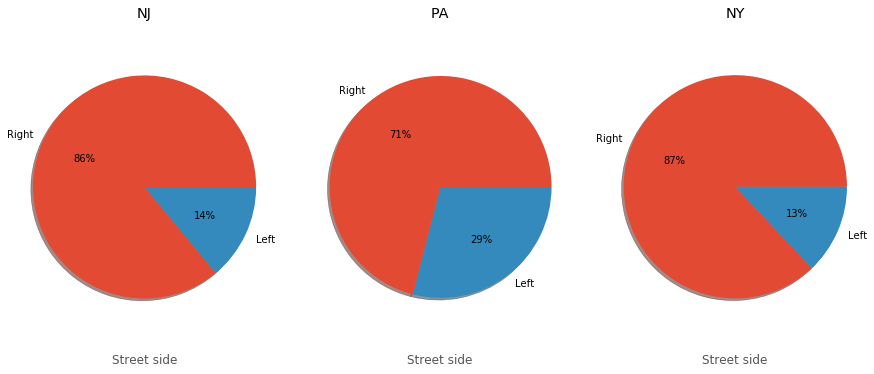

In [19]:
# The relative side of the street (Right/Left) in address field for each state.
# Set the size of the figure
fig= plt.figure(figsize=(15,6))
labels=['Right','Left']

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df_side=df[df['State']==state]['Side'].value_counts(normalize=True).round(2)

    plt.pie(df_side, labels=labels, autopct='%1.0f%%', shadow=True)

    plt.axis('equal')
    plt.xlabel('Street side')
    plt.title('{}'.format(state))

plt.show()

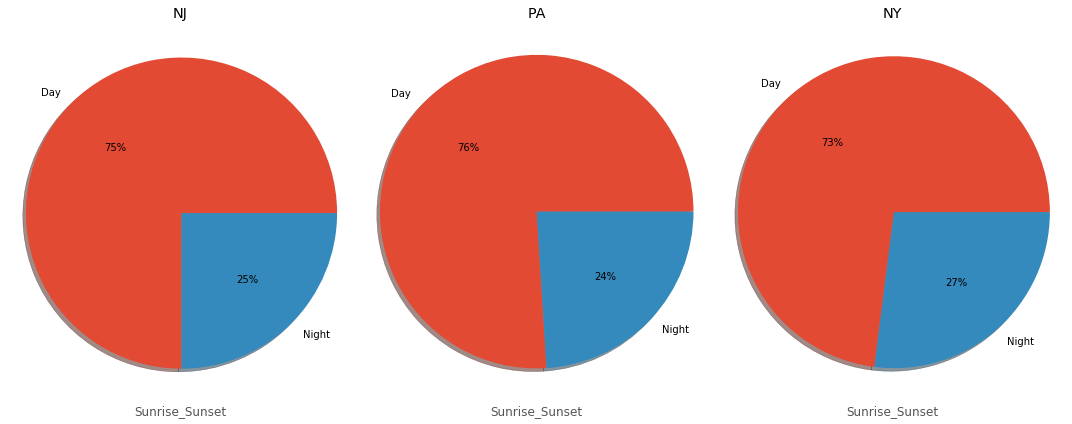

In [13]:
# The day or night when accidents occurred for each state
feature='Sunrise_Sunset'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

In [9]:
df[df['State']==state]['Weather_Condition'].value_counts(normalize=True).round(5)

Clear                           0.22225
Mostly Cloudy                   0.19728
Overcast                        0.19283
Partly Cloudy                   0.12082
Scattered Clouds                0.10245
Light Rain                      0.06219
Light Snow                      0.05045
Rain                            0.01150
Light Drizzle                   0.00662
Snow                            0.00618
Fog                             0.00538
Heavy Rain                      0.00370
Haze                            0.00296
Light Freezing Rain             0.00264
Heavy Snow                      0.00254
Light Thunderstorms and Rain    0.00205
Mist                            0.00135
Patches of Fog                  0.00112
Thunderstorm                    0.00073
Light Ice Pellets               0.00070
Blowing Snow                    0.00068
Shallow Fog                     0.00059
Light Freezing Fog              0.00058
Drizzle                         0.00051
Heavy Thunderstorms and Rain    0.00048


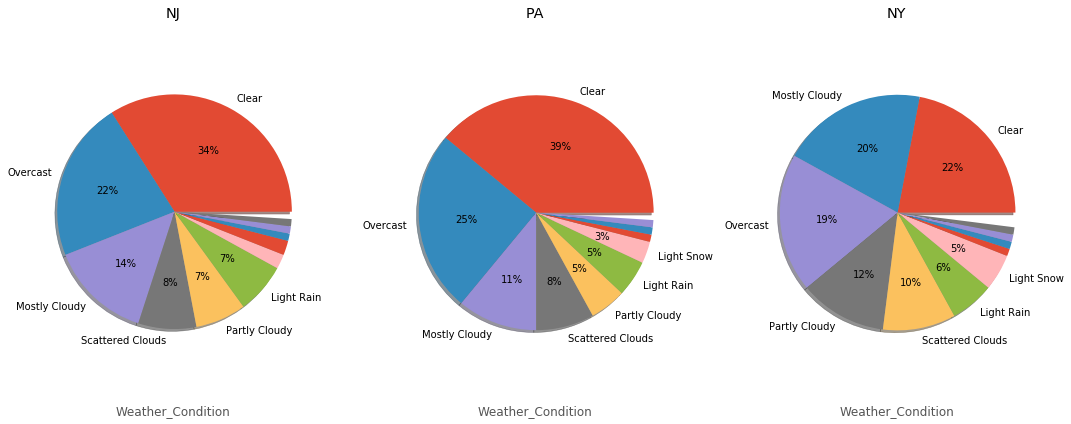

In [20]:
# The weather condition for each state
feature='Weather_Condition'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

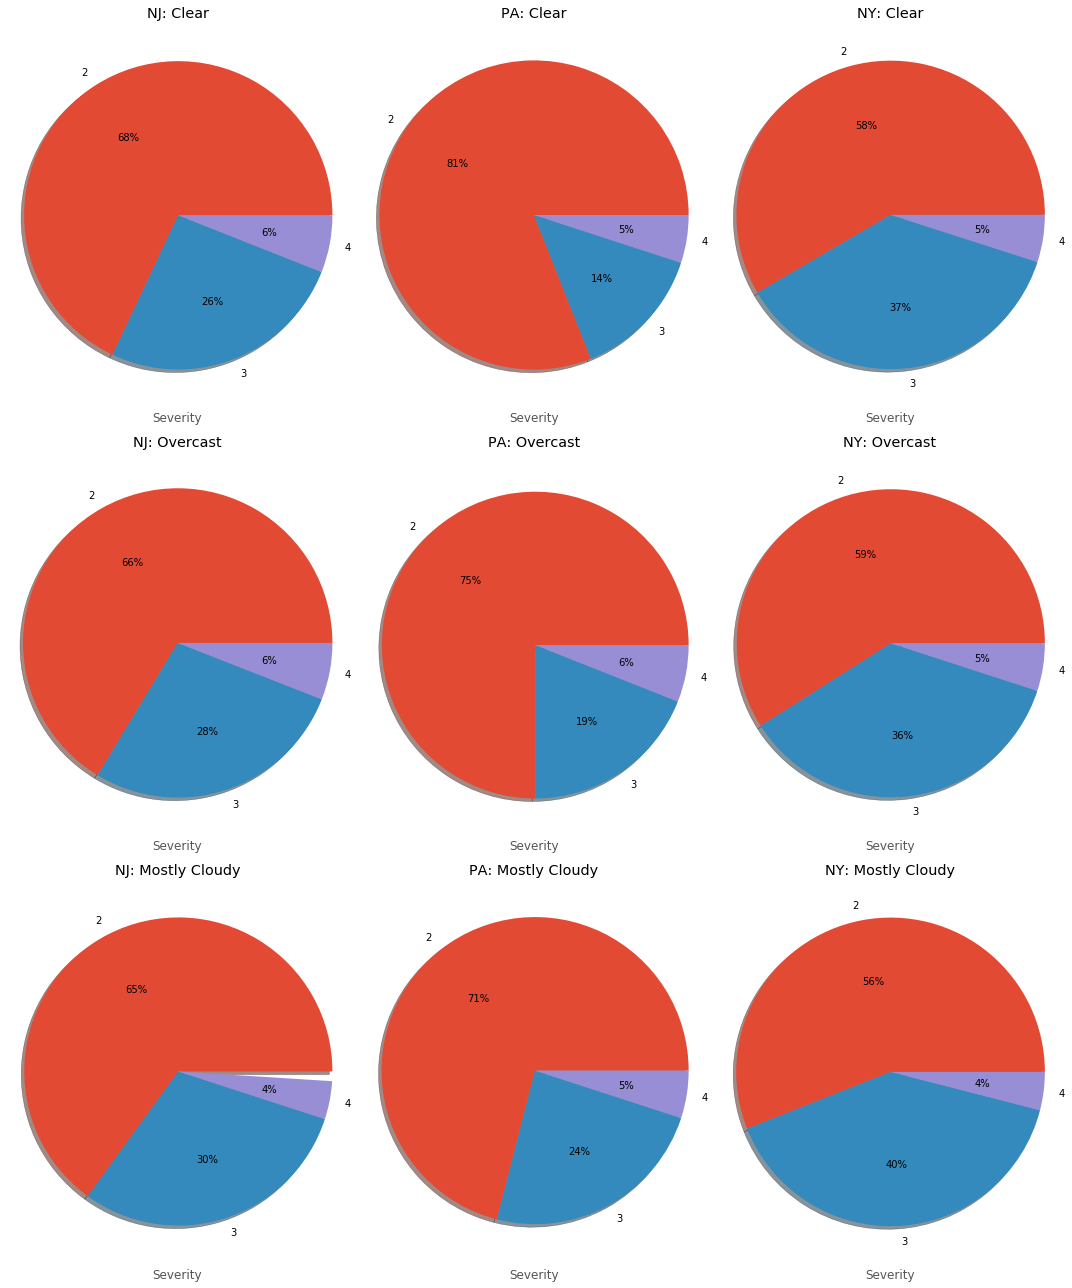

In [22]:
# The weather condition for each state; for each of the following weather conditions (Clear, Overcast and Mostly Cloudy), what's the severity?
feature='Severity'
weather_lst=['Clear','Overcast','Mostly Cloudy']
fig_x=len(state_lst)
fig_y=len(weather_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each weather condition
for i,weather in enumerate(weather_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Weather_Condition']==weather)][feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': '+weather)

plt.tight_layout()
plt.show()

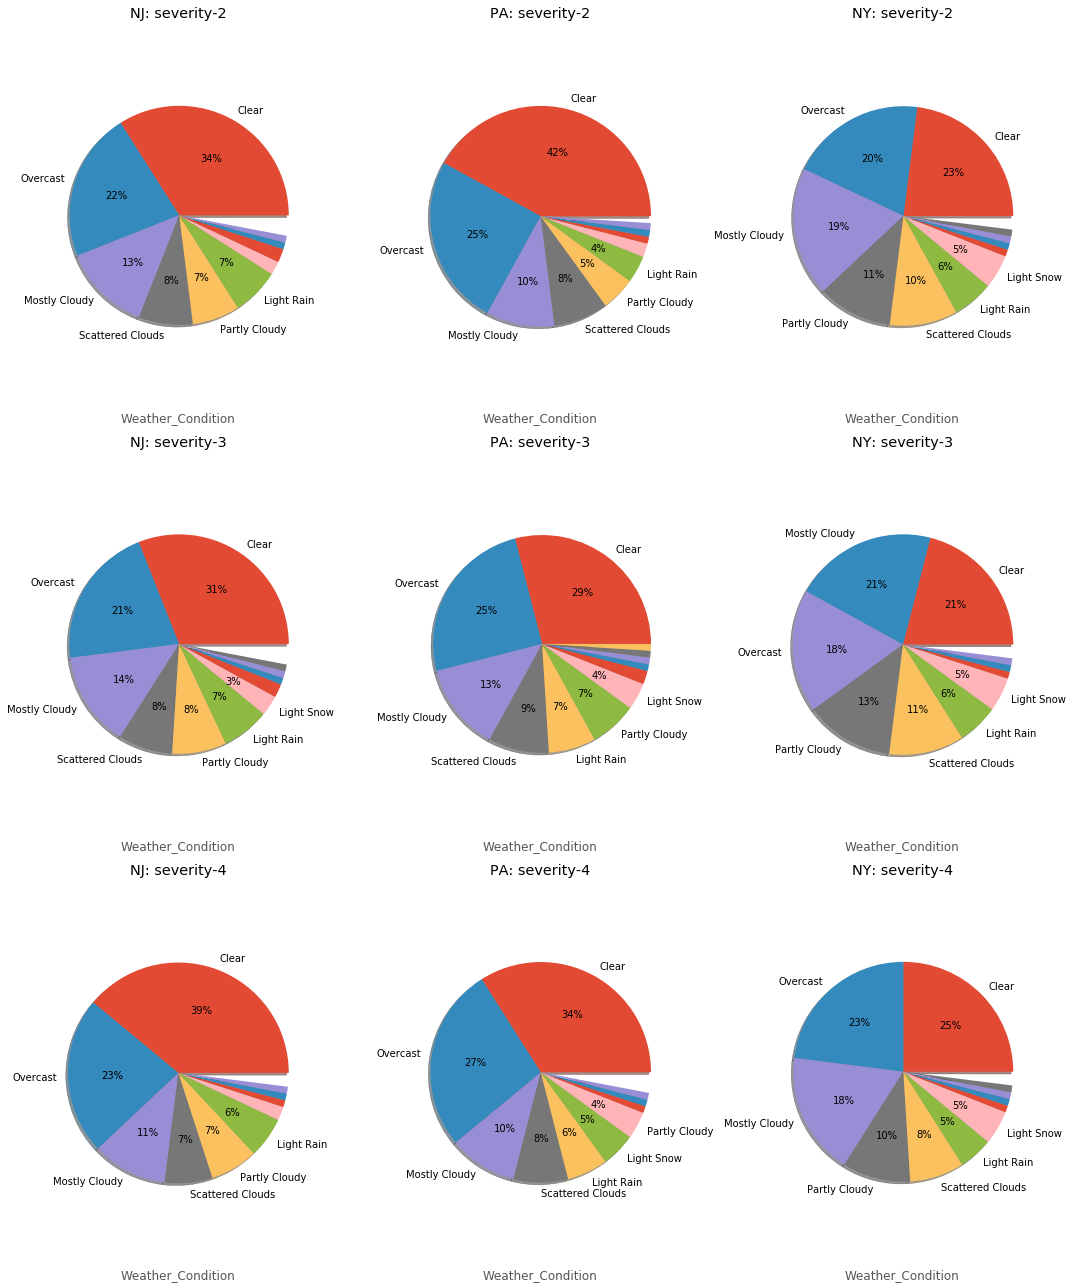

In [25]:
# The weather condition for each state; for each of the following Severity (2,3,4), what's the weather conditions?
feature='Weather_Condition'
severity_lst=[2,3,4]
fig_x=len(state_lst)
fig_y=len(severity_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each weather condition
for i,severity in enumerate(severity_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)][feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': severity-'+str(severity))

plt.tight_layout()
plt.show()

In [11]:
df.Severity.value_counts().sort_values(ascending=False)

2    144380
3     66594
4     10640
1        68
0         1
Name: Severity, dtype: int64

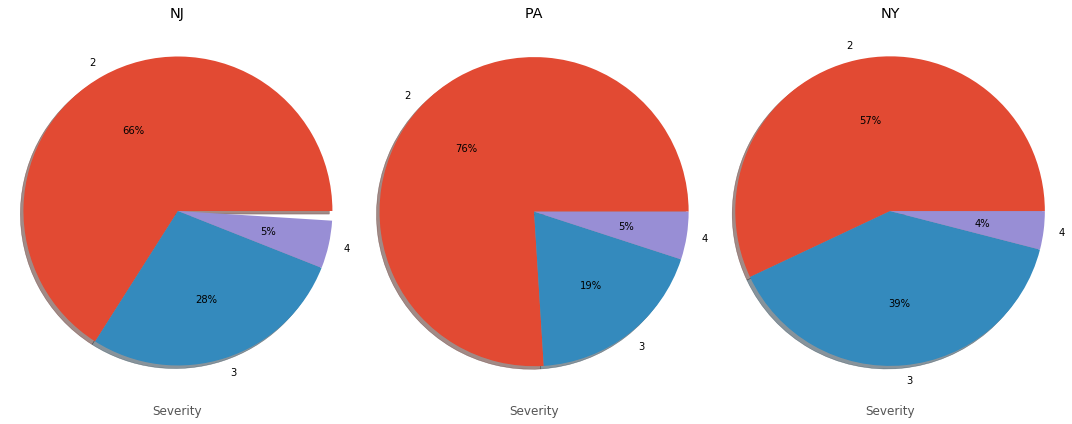

In [12]:
# The severity of accidents for each state
feature='Severity'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

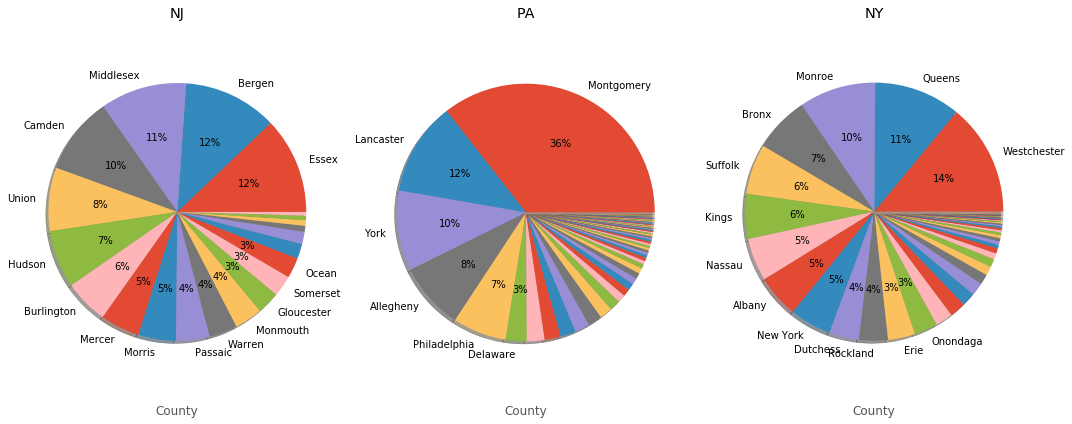

In [13]:
# The county distribution of accidents for each state
feature='County'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

In [14]:
df[df['State']=='NJ']['City'].value_counts(normalize=True)

Newark             0.056982
Fort Lee           0.031379
Trenton            0.029049
Jersey City        0.026620
Bellmawr           0.019308
                     ...   
Cookstown          0.000025
Oceanport          0.000025
Lanoka Harbor      0.000025
South Brunswick    0.000025
Mount Arlington    0.000025
Name: City, Length: 521, dtype: float64

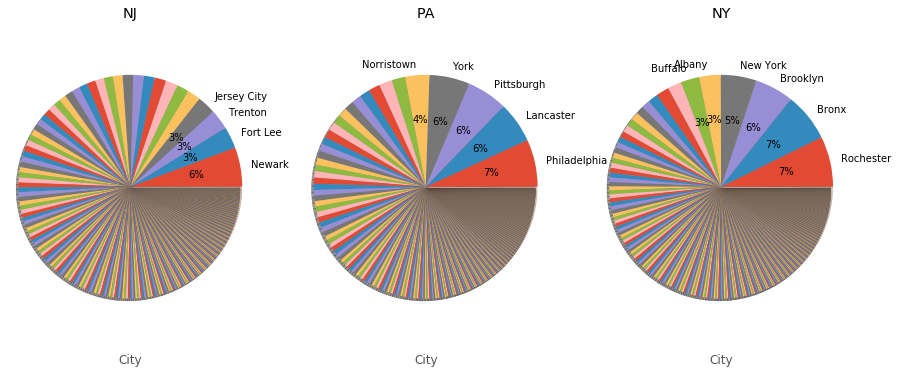

In [15]:
# The city distribution of accidents for each state
feature='City'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

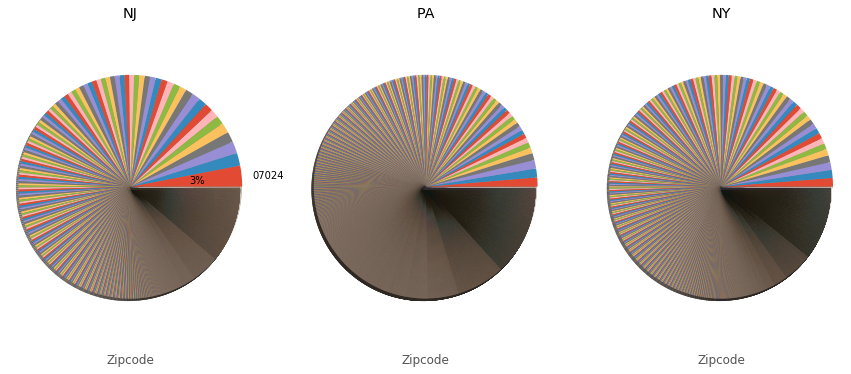

In [16]:
# The zip code distribution of accidents for each state
feature='Zipcode'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(8)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

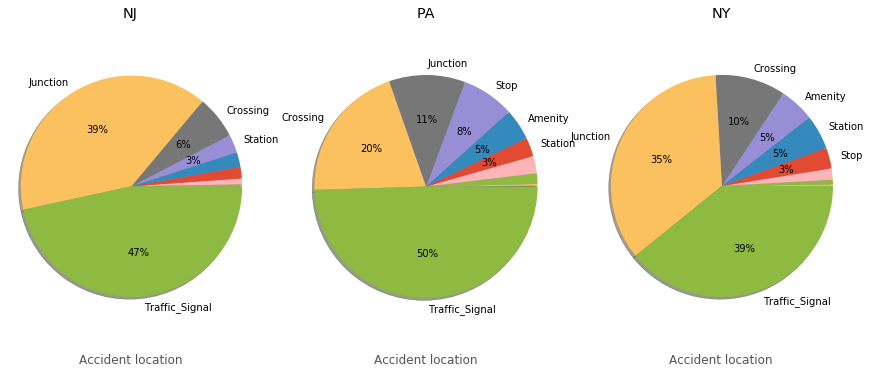

In [26]:
# The location of accidents for each state
# Where are the accidents?
feature='Accident location'

# Set the state as the index
df.set_index('State',drop=True,inplace=True)

# State is the index when selecting bool type data as df_bool
df_bool=df.select_dtypes(include=['bool'])

# Reset the index of the original data for other calculations
df.reset_index(inplace=True)

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

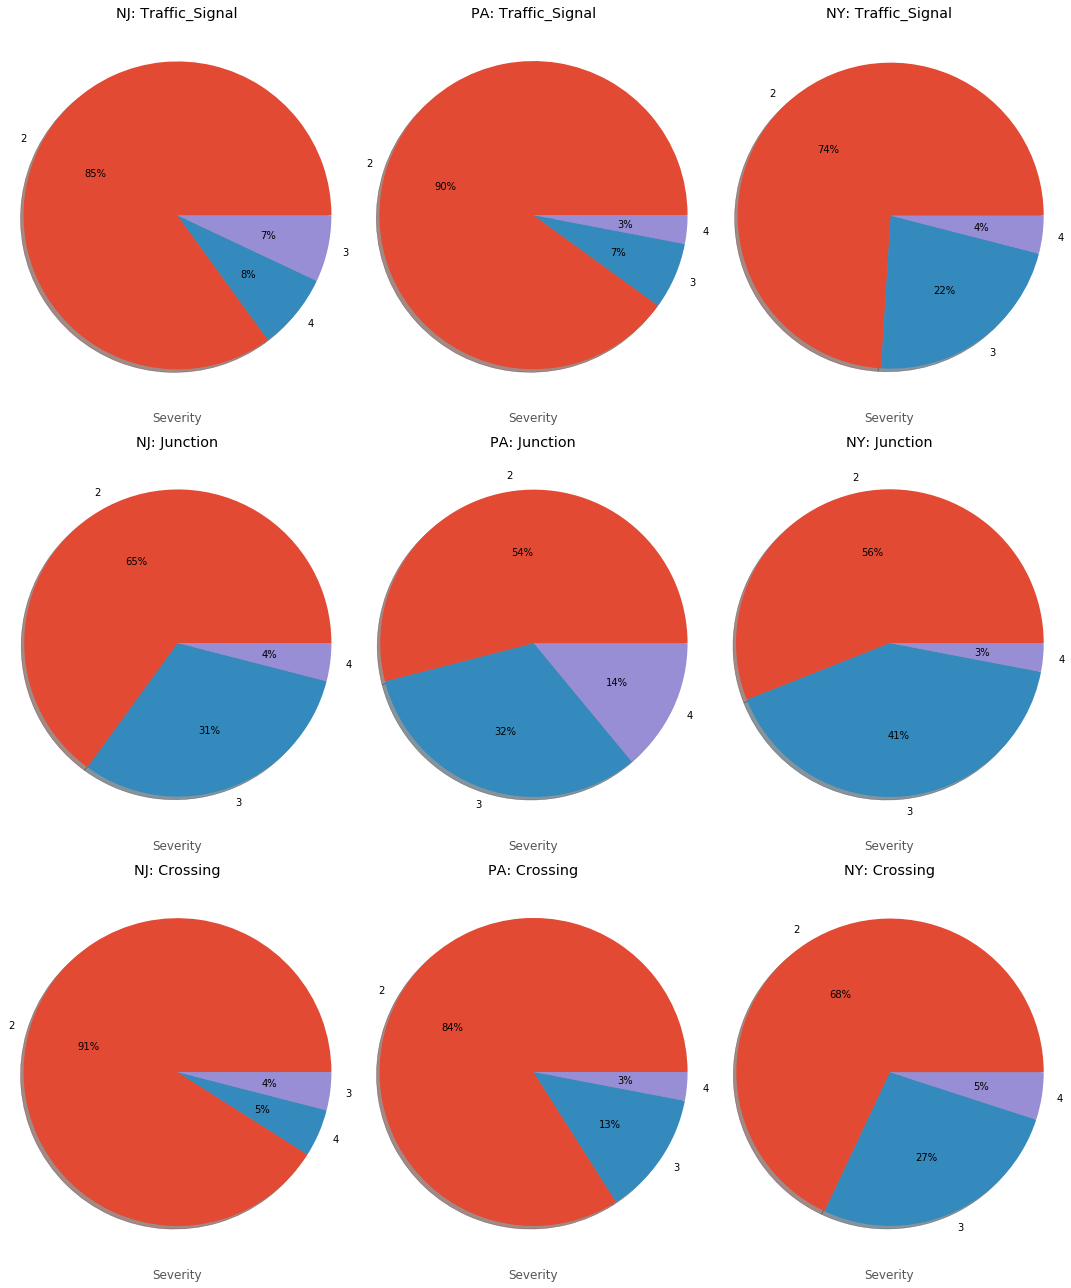

In [47]:
# Select the data with a list of columns as State, Severity and the location list
# List the locations with data types as boolean
col_sel=list(df.dtypes[df.dtypes=='bool'].index)

# Append stat and severity to the list
col_sel.append('State')
col_sel.append('Severity')

# Slice the dataframe with the list above
df_sel=df[col_sel]

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Severity'
loc_lst=['Traffic_Signal','Junction', 'Crossing']
fig_x=len(state_lst)
fig_y=len(loc_lst)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6*fig_y))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each location
for i,loc in enumerate(loc_lst):
    # Run a for loop for each state
    for j,state in enumerate(state_lst):
    
        # Set a sub plot
        plt.subplot(fig_y, fig_x, i*fig_x+j+1)
        # Slice the dataframe for the specific state, weather condition and feature
        
        df_temp=df_sel
                   
        df_temp=df_temp[(df_temp['State']==state) & (df_temp[loc]==True)]
        
        df_temp=df_temp[feature].value_counts(normalize=True).round(2)

        # Define lables to go with the pie plot
        labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
        # Generate the pie plot
        plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
        # Set axis,label and title
        plt.axis('equal')
        plt.xlabel(feature)
        plt.title(state+': '+loc)

plt.tight_layout()
plt.show()

In [6]:
# For each state, find out how many unique days for each weekday/weekend

# Initialize an empty list to hold the number of days for each weekday/weekend for the three states
weekday_num_state=[]

# Run a for loop for the list of states: NJ, PA, & NY
for state in state_lst:
    
    # Initialize an empty list to hold the number of days for each weekday
    weekday_num=[]
    
    # Run a for loop for the whole week
    for weekday in weekday_lst:
        
        # Slice the dataframe for specific state & weekday
        df_weekday=df[(df['State']==state) & (df.Start_Weekday==weekday)]
        
        # For each weekday, extract the day information from the Start_Time column, by separating the datetime into day and hour
        day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
        
        # Extract the first item which is the day information
        day_lst2=[item[0] for item in day_lst1]
        
        # Append the day into the list weekday_num
        weekday_num.append(len(set(day_lst2)))

    # Append the day with state information encoded into the list weekday_num_state
    weekday_num_state.append(weekday_num)

print('For the states of {}, here is the list of numbers of weekdays (Mon-Sun): {}.'.format(state_lst,weekday_num_state))



For the states of ['NJ', 'PA', 'NY'], here is the list of numbers of weekdays (Mon-Sun): [[157, 157, 157, 158, 156, 154, 156], [163, 162, 161, 165, 160, 156, 154], [158, 157, 157, 158, 155, 154, 156]].


In [20]:
# Print the list of lists
weekday_num_state

[[157, 157, 157, 158, 156, 154, 156],
 [163, 162, 161, 165, 160, 156, 154],
 [158, 157, 157, 158, 155, 154, 156]]

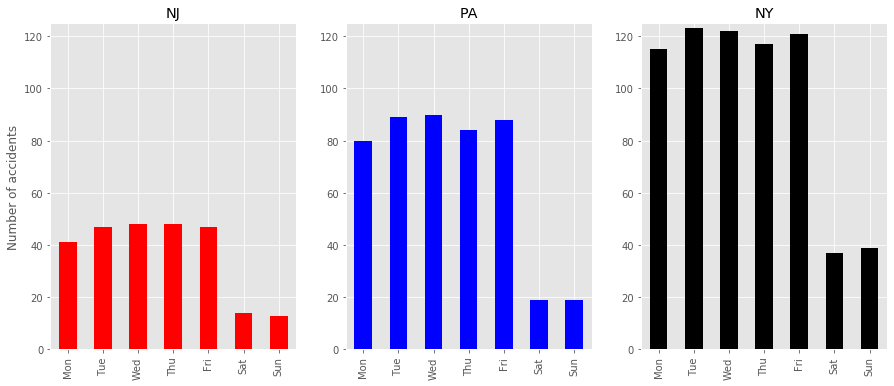

In [21]:
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Divide the total number of accidents by the number of unique days

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Remove xlabels
    plt.xlabel('')
    
    # Replace the xticks with weekday
    plt.xticks(np.arange(7),weekday_lst)
    
    # Set the limit of y axis
    plt.ylim(0, 125)
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

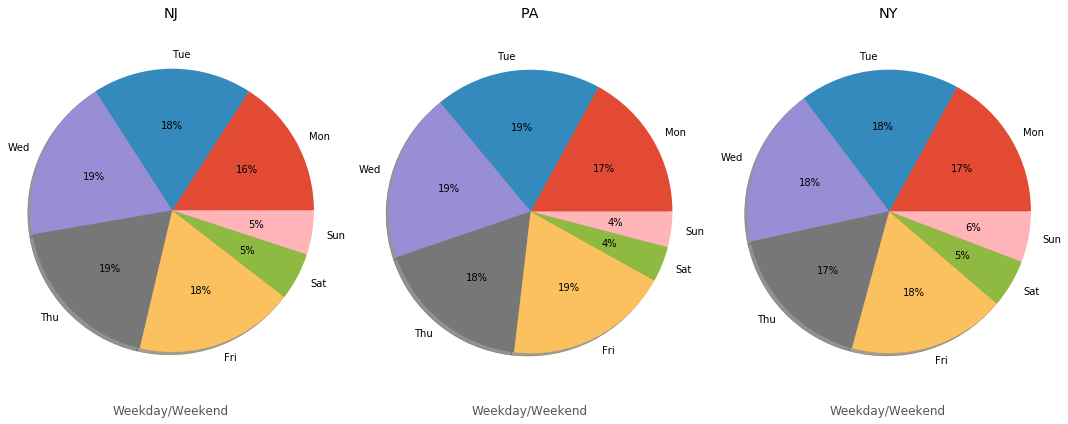

In [14]:
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Start_Weekday'
fig_x=len(state_lst)


# Divide the total number of accidents by the number of unique days

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    # df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else '' for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp2, labels=labels, autopct=my_autopct, shadow=True)
        
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Weekday/Weekend')
    plt.title(state)

        

plt.tight_layout()
plt.show()

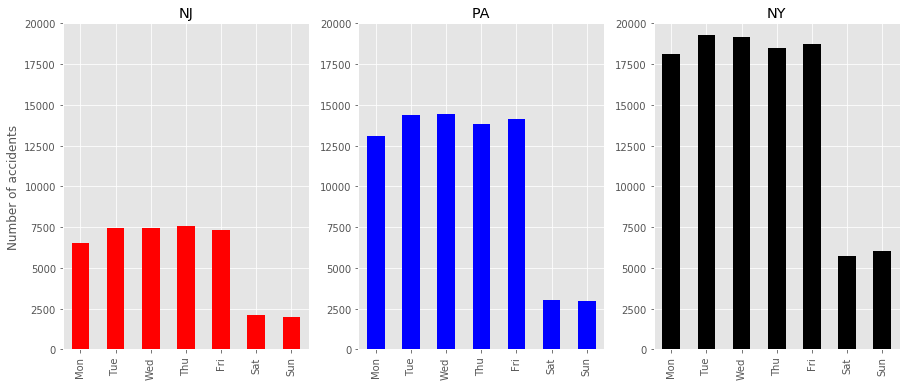

In [22]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY (for the whole dataset)
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst).plot(kind='bar',color=color_lst[i]).set_title(state)
    plt.xlabel('')
    plt.ylim(0, 20000)
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')



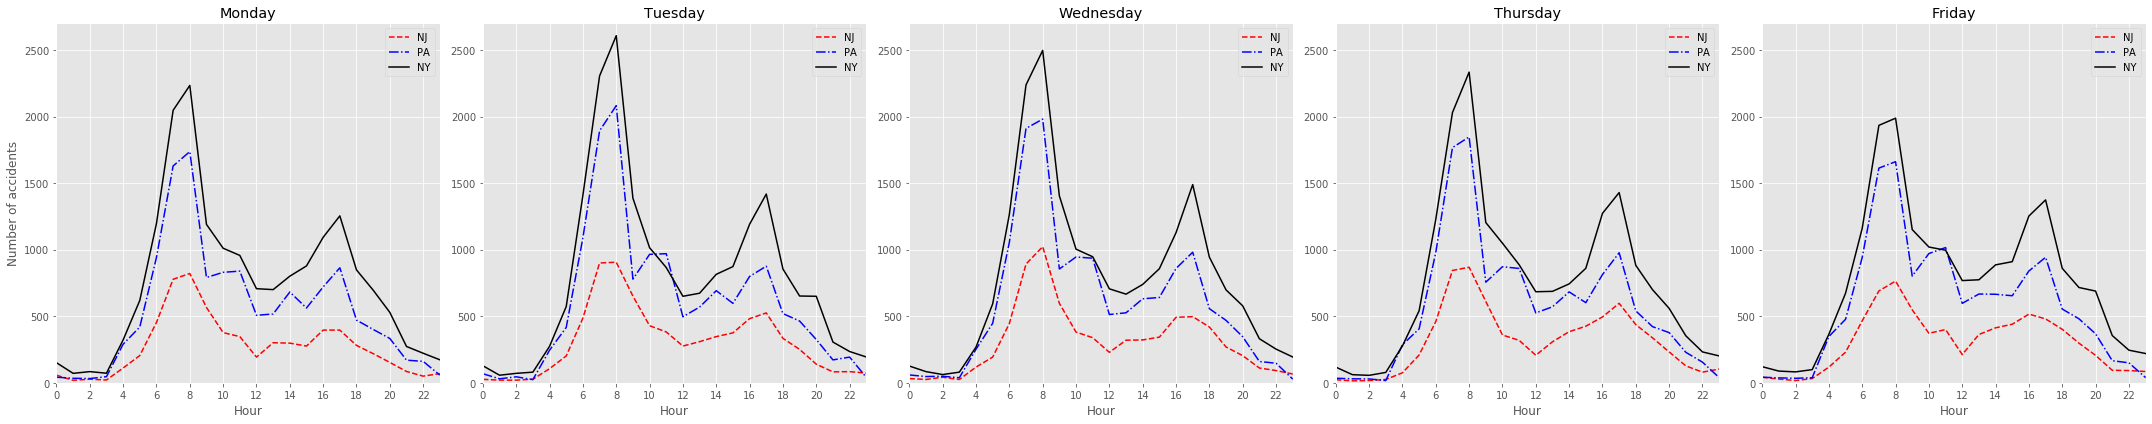

In [24]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY
# Set the size of the figure
fig= plt.figure(figsize=(30,6))
n=5

# Make subplots on each weekday with a for loop
for i in range(n):
    plt.subplot(1, 5, i+1)
    # Plot the state of New Jersey on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NJ') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
    # Plot the state of Pennsylvania on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='PA') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
    # Plot the state of New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NY') & (df['Start_Weekday']==weekday_lst[i])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')
    
    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.ylim(0, 2700)
    plt.legend(['NJ','PA','NY'])
    plt.title(weekday_lst_full[i])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()

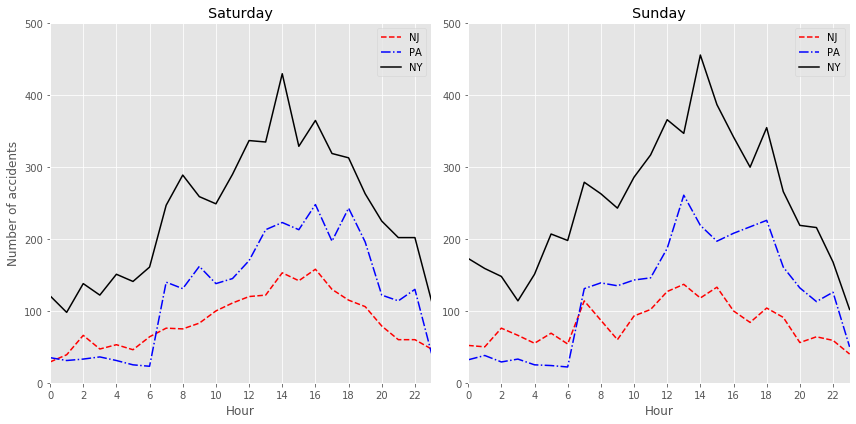

In [26]:
# Hourly distribution of accidents on weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(12,6))

# Make subplots on each weekday with a for loop
for i in range(2):
    # Set the subplot
    plt.subplot(1, 2, i+1)
    # Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NJ') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
    # Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='PA') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
    # Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NY') & (df['Start_Weekday']==weekday_lst[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.ylim(0, 500)
    plt.legend(['NJ','PA','NY'])
    plt.title(weekday_lst_full[i+5])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()


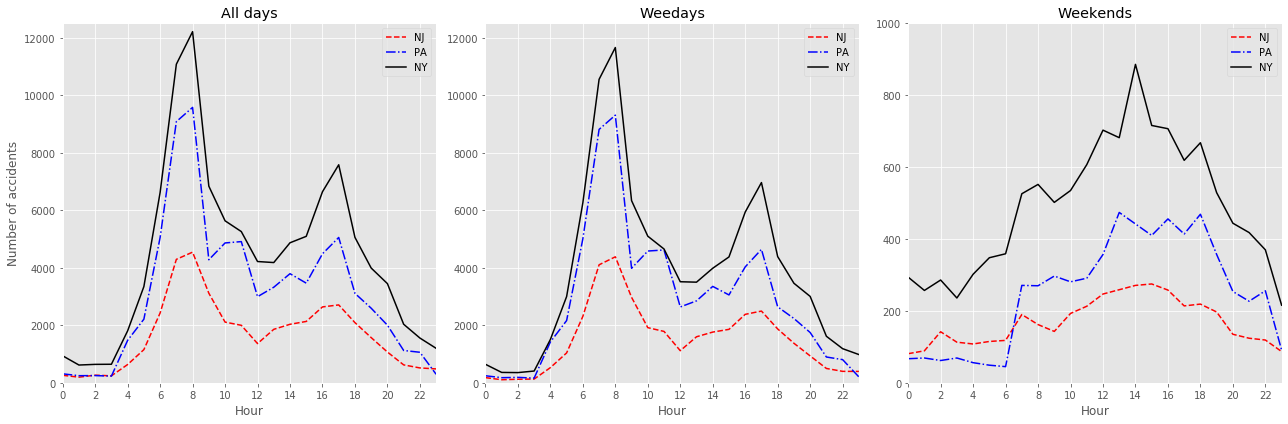

In [28]:
# Hourly distribution of accidents on all days, weekdays, & weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(18,6))

# Plot all data together

plt.subplot(1, 3, 1)

# Plot the states of New Jersey, Pennsylvania, & New York on all days, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[df['State']=='NJ'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

df[df['State']=='PA'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

df[df['State']=='NY'].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['NJ','PA','NY'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

# Weekdays
plt.subplot(1, 3, 2)

# Plot the states of New Jersey, Pennsylvania, & New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NJ') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')

df[(df['State']=='PA') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')

df[(df['State']=='NY') & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['NJ','PA','NY'])
plt.title('Weedays')
plt.xticks(np.arange(0, 24, step=2))

# Weekends
plt.subplot(1, 3, 3)

# Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NJ') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashed',color='r')
# Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='PA') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='dashdot',color='b')
# Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NY') & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 1000)
plt.legend(['NJ','PA','NY'])
plt.title('Weekends')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()

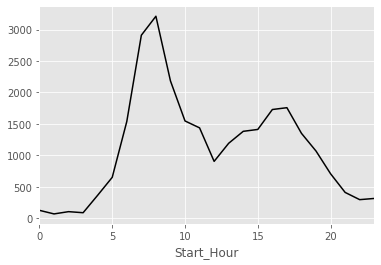

In [24]:
state='NJ'
severity=2
df_temp=df[(df['State']==state) & (df['Severity']==severity)].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
df_temp.plot(linestyle=linestyle_lst[i], color=color_lst[i])

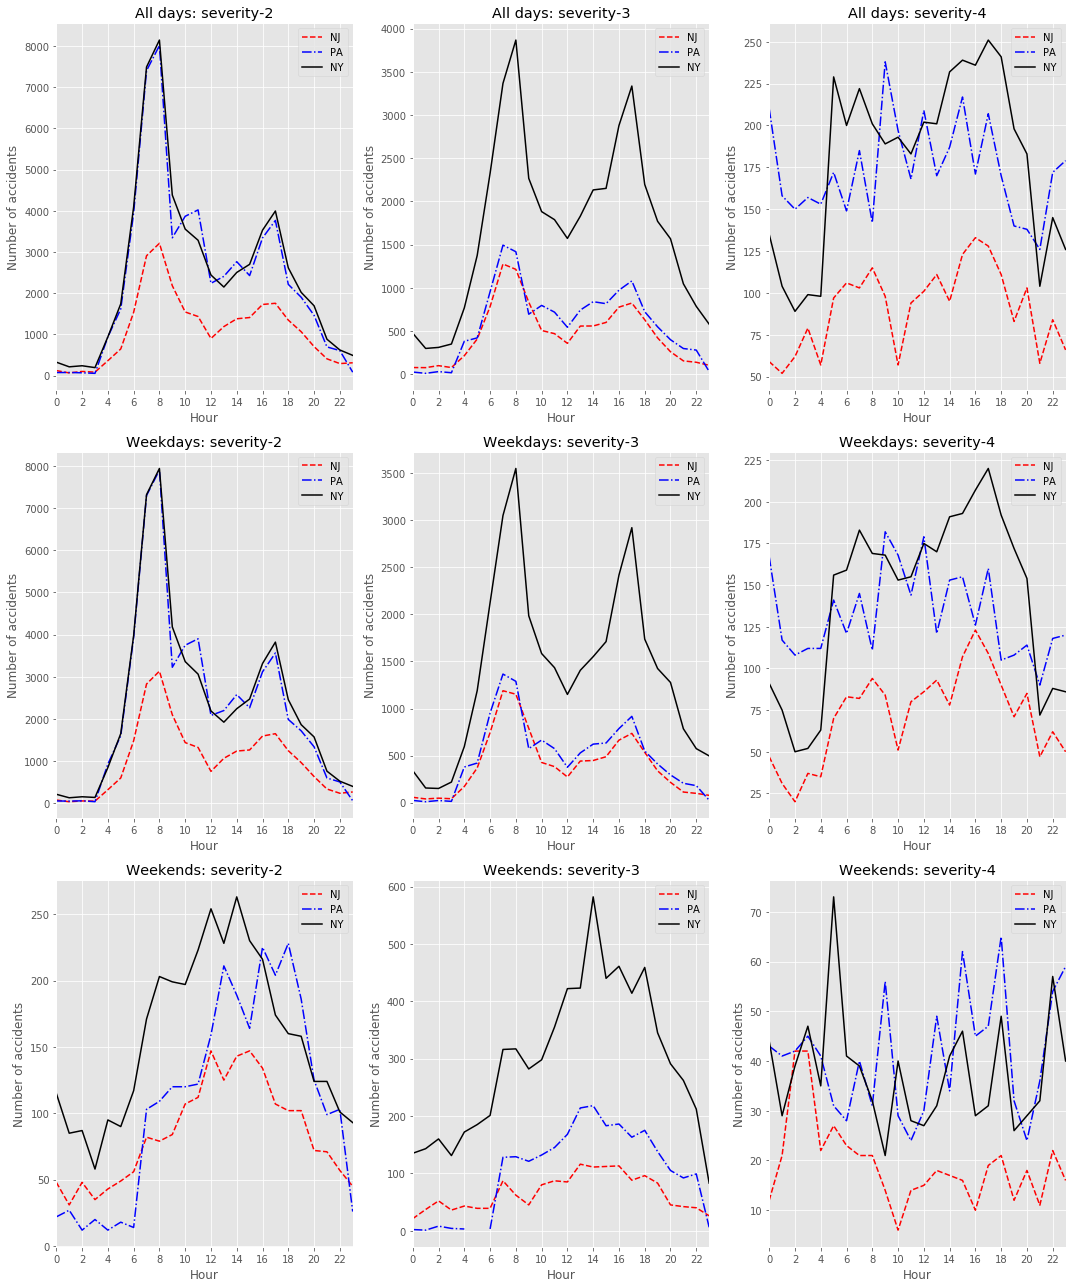

In [34]:
### To Be Continued... divide by number of unique days.

# Hourly distribution of accidents (severity 2, 3, & 4) per day on all days, weekdays, & weekends in NJ, PA & NY

feature='Severity'
feature2=['All days', 'Weekdays','Weekends']
severity_lst=[2,3,4]
fig_x=len(state_lst)
fig_y=len(severity_lst)
fig_z=len(feature2)

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_z,6*fig_y))

# Run a for loop for each weather condition and each state for all days together
for i,severity in enumerate(severity_lst):

    ### ###
    # All days
    # Set a sub plot
    plt.subplot(fig_z, fig_y, i+1)
    
    # Run a for loop for each state, all days
    for j,state in enumerate(state_lst):
            
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity)].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
           
        # Generate the scatter plot
 
        df_temp.plot(linestyle=linestyle_lst[j], color=color_lst[j])   
            
        # Set labels, limit, legend, title and xticks
        
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
        
    # plt.xlim(0, 23)
    # plt.ylim(0, 12500)
    plt.legend(['NJ','PA','NY'])
    plt.title('All days'+': severity-'+str(severity))
    plt.xticks(np.arange(0, 24, step=2))

    ### ###
    # Weekdays
    # Set a sub plot
    plt.subplot(fig_z, fig_y, i+1+fig_y)
    
    # Run a for loop for each state, weekdays
    for j,state in enumerate(state_lst):
            
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity) & (df['Start_Weekday'].isin(weekday_lst[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
           
        # Generate the scatter plot
 
        df_temp.plot(linestyle=linestyle_lst[j], color=color_lst[j])   
            
        # Set labels, limit, legend, title and xticks
        
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
        
    # plt.xlim(0, 23)
    # plt.ylim(0, 12500)
    plt.legend(['NJ','PA','NY'])
    plt.title('Weekdays'+': severity-'+str(severity))
    plt.xticks(np.arange(0, 24, step=2))

    
    ### ###
    # Weekends
    # Set a sub plot
    plt.subplot(fig_z, fig_y, i+1+fig_y+fig_y)
    
    # Run a for loop for each state, weekdays
    for j,state in enumerate(state_lst):
            
        # Slice the dataframe for the specific state, weather condition and feature
        df_temp=df[(df['State']==state) & (df['Severity']==severity) & (df['Start_Weekday'].isin(weekday_lst[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_lst)
           
        # Generate the scatter plot
 
        df_temp.plot(linestyle=linestyle_lst[j], color=color_lst[j])   
            
        # Set labels, limit, legend, title and xticks
        
    plt.xlabel('Hour')
    plt.ylabel('Number of accidents')
        
    # plt.xlim(0, 23)
    # plt.ylim(0, 12500)
    plt.legend(['NJ','PA','NY'])
    plt.title('Weekends'+': severity-'+str(severity))
    plt.xticks(np.arange(0, 24, step=2))
    
plt.tight_layout()
plt.show()



